In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

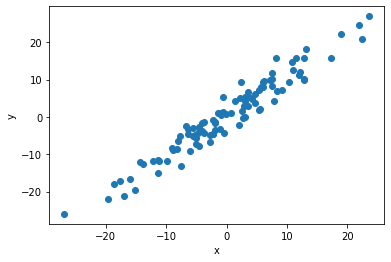

In [2]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [4]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

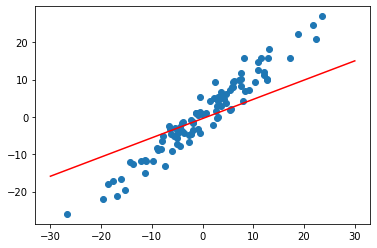

In [7]:
plot_fit('Initial Model')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [9]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 34.23326110839844
epoch: 1 loss: 24.39423370361328
epoch: 2 loss: 18.133033752441406
epoch: 3 loss: 14.145790100097656
epoch: 4 loss: 11.603889465332031
epoch: 5 loss: 9.980774879455566
epoch: 6 loss: 8.941825866699219
epoch: 7 loss: 8.274397850036621
epoch: 8 loss: 7.843343734741211
epoch: 9 loss: 7.562766075134277
epoch: 10 loss: 7.378078460693359
epoch: 11 loss: 7.254580020904541
epoch: 12 loss: 7.170206069946289
epoch: 13 loss: 7.110929489135742
epoch: 14 loss: 7.067823886871338
epoch: 15 loss: 7.035210609436035
epoch: 16 loss: 7.0094709396362305
epoch: 17 loss: 6.988296985626221
epoch: 18 loss: 6.970219135284424
epoch: 19 loss: 6.954288959503174
epoch: 20 loss: 6.939898490905762
epoch: 21 loss: 6.926657676696777
epoch: 22 loss: 6.914308071136475
epoch: 23 loss: 6.902679920196533
epoch: 24 loss: 6.891663074493408
epoch: 25 loss: 6.881175518035889
epoch: 26 loss: 6.871163368225098
epoch: 27 loss: 6.861586093902588
epoch: 28 loss: 6.852411270141602
epoch: 29 loss: 6.84

Text(0.5, 0, 'epoch')

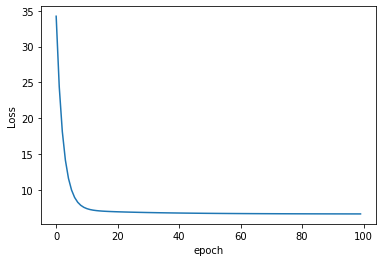

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

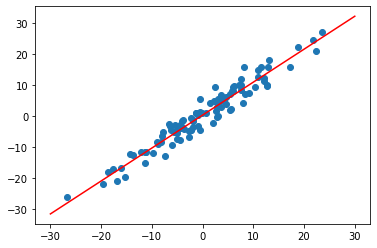

In [11]:
plot_fit("Trained Model")